Knock airport Weather
Create a notebook called assignment_6_Weather.ipynb

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)
Plot:

The temperature

The mean temperature each day

The mean temperature for each month

60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column)

The rolling windspeed (say over 24 hours)

The max windspeed for each day

The monthly mean of the daily max windspeeds (yer I am being nasty here)

You do not need to over comment your code. Marks will be given for how nice the plots are.

Plot:

The temperature

References: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [143]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Read the csv file, select data for analysis using parameter skiprows
df = pd.read_csv("hly4935.csv", skiprows=23,low_memory=False)

In [144]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
df.head()

#https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


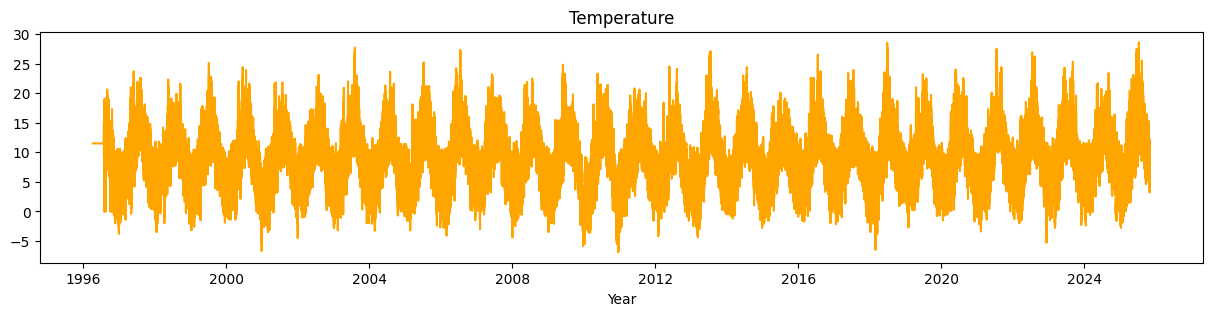

In [145]:
# Plot temperature
plt.figure(figsize=(15,3))
plt.plot(df["date"], df["temp"], label="Temperature", color="orange")
plt.title('Temperature')
plt.xlabel('Year')
plt.show()

In [146]:
df_filled = df.fillna(0)
df_filled.to_csv("weather.csv")

The mean temperature each day

In [147]:
# Create a new columns: 'dateonly' and 'month' from 'date'
df['dateonly']= df['date'].dt.date
df['month'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df.head(10)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,dateonly,month
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,25,81,0.0,35000,32,5,1996-04-10,1996-04
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,25,82,0.0,40000,45,5,1996-07-31,1996-07
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,80,81,0.0,8000,32,7,1996-07-31,1996-07
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,25,82,0.0,28000,35,6,1996-07-31,1996-07
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,2,11,0.0,40000,40,6,1996-07-31,1996-07
5,1996-07-31 12:00:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,1,82,0.0,40000,43,6,1996-07-31,1996-07
6,1996-07-31 13:00:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,...,0,0,2,11,0.0,40000,43,5,1996-07-31,1996-07
7,1996-07-31 14:00:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,...,0,0,2,11,0.0,50000,45,6,1996-07-31,1996-07
8,1996-07-31 15:00:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,...,0,0,25,82,0.0,8000,45,7,1996-07-31,1996-07
9,1996-07-31 16:00:00,0,0.0,0,15.1,0,11.3,7.5,0.0,0,...,0,0,25,82,0.0,35000,40,7,1996-07-31,1996-07


In [148]:
#Pivot table
df_anal = pd.pivot_table(df,values='temp',
                          index='dateonly',
                          aggfunc='mean')
print(df_anal)

                 temp
dateonly             
1996-04-10  11.500000
1996-07-31  12.650000
1996-08-01  11.666667
1996-08-02  12.504167
1996-08-03  14.266667
...               ...
2025-10-28   8.604167
2025-10-29   6.612500
2025-10-30   7.887500
2025-10-31   9.670833
2025-11-01   7.400000

[10687 rows x 1 columns]


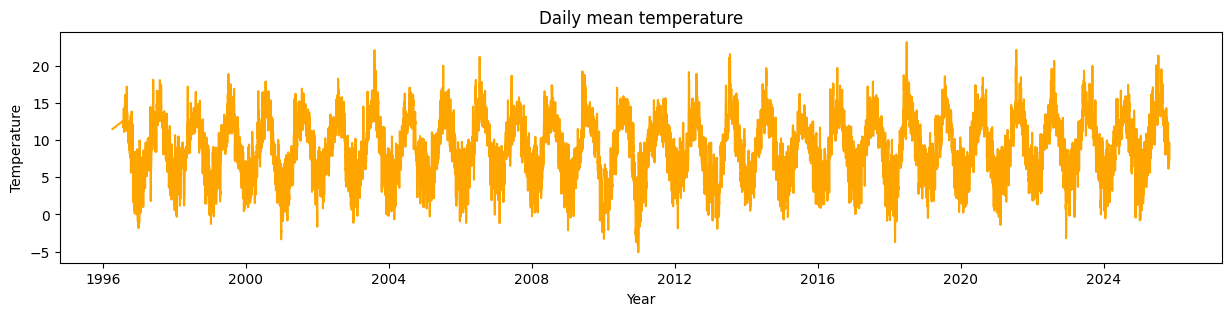

In [149]:
# Plot mean temperature each day
plt.figure(figsize=(15,3))
plt.plot(df_anal.index, df_anal["temp"], color="orange")
plt.title('Daily mean temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

The mean temperature for each month

In [150]:
#Pivot table
df_anal1 = pd.pivot_table(df,values='temp',
                          index='month',
                          aggfunc='mean')
print(df_anal1)

              temp
month             
1996-04  11.500000
1996-07  12.650000
1996-08  12.946909
1996-09  12.174306
1996-10   9.614113
...            ...
2025-07  15.068280
2025-08  15.178495
2025-09  11.368056
2025-10   9.900134
2025-11   7.400000

[354 rows x 1 columns]


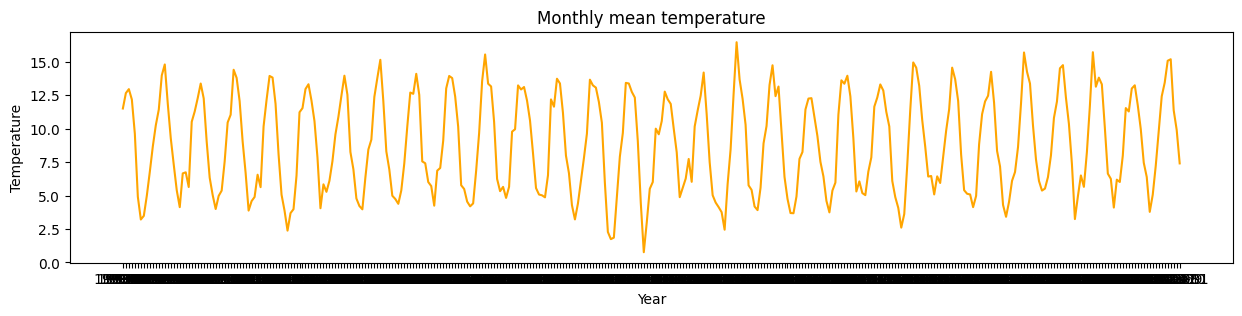

In [151]:
# Plot mean temperature each month
plt.figure(figsize=(15,3))
plt.plot(df_anal1.index, df_anal1["temp"], color="orange")
plt.title('Monthly mean temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

Plot:

The Windspeed (there is data missing from this column)

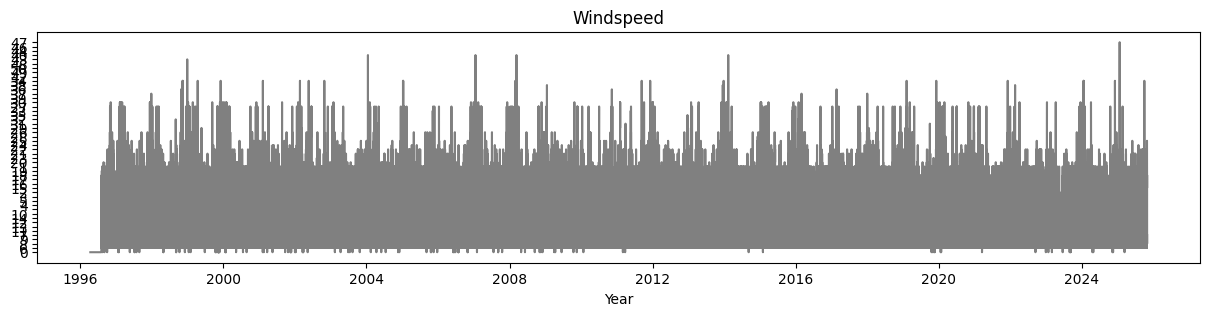

In [152]:
plt.figure(figsize=(15,3))
plt.plot(df["date"], df["wdsp"], color="grey")
plt.title('Windspeed')
plt.xlabel('Year')
plt.show()

The rolling windspeed (say over 24 hours)

In [153]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [154]:
# Set index
df = df.set_index('date')#.sort_index()
df.head(20)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,dateonly,month
date,,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,...,0,0,25,81,0.0,35000,32,5,1996-04-10,1996-04
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,...,0,0,25,82,0.0,40000,45,5,1996-07-31,1996-07
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0,0,80,81,0.0,8000,32,7,1996-07-31,1996-07
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,...,0,0,25,82,0.0,28000,35,6,1996-07-31,1996-07
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,...,0,0,2,11,0.0,40000,40,6,1996-07-31,1996-07
1996-07-31 12:00:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,1010.9,...,0,0,1,82,0.0,40000,43,6,1996-07-31,1996-07
1996-07-31 13:00:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,1011.2,...,0,0,2,11,0.0,40000,43,5,1996-07-31,1996-07
1996-07-31 14:00:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,1011.3,...,0,0,2,11,0.0,50000,45,6,1996-07-31,1996-07
1996-07-31 15:00:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,1011.6,...,0,0,25,82,0.0,8000,45,7,1996-07-31,1996-07


In [155]:
print(df.index.max())

2025-11-01 00:00:00


In [156]:
# --- IMPORTANT ---
# Reindex to continuous hourly timestamps (fills all missing hours)
df = df.reindex(pd.date_range(df.index.min(), df.index.max(), freq='h'))
df.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,dateonly,month
1996-04-10 14:00:00,0.0,0.0,0.0,11.5,0.0,8.1,3.9,0.0,0.0,1016.7,...,0.0,0,25,81,0.0,35000,32,5,1996-04-10,1996-04
1996-04-10 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-10 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-10 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-10 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce').astype(float)

In [164]:
# Interpolate missing windspeed (linear is best for meteorological data)
#df['wdsp']=df['wdsp'].astype('float64')
df['wdsp'] = df['wdsp'].interpolate(method='time', limit_direction='both', limit_area='inside', limit=500)
df['wdsp'].head()

1996-04-10 14:00:00    0.0
1996-04-10 15:00:00    0.0
1996-04-10 16:00:00    0.0
1996-04-10 17:00:00    0.0
1996-04-10 18:00:00    0.0
Freq: h, Name: wdsp, dtype: float64

In [173]:
# 24-hour rolling mean over time-based window
df['wdsp'] = df['wdsp'].rolling('24h').mean()
df['wdsp'].head()

1996-04-10 14:00:00    0.0
1996-04-10 15:00:00    0.0
1996-04-10 16:00:00    0.0
1996-04-10 17:00:00    0.0
1996-04-10 18:00:00    0.0
Freq: h, Name: wdsp, dtype: float64

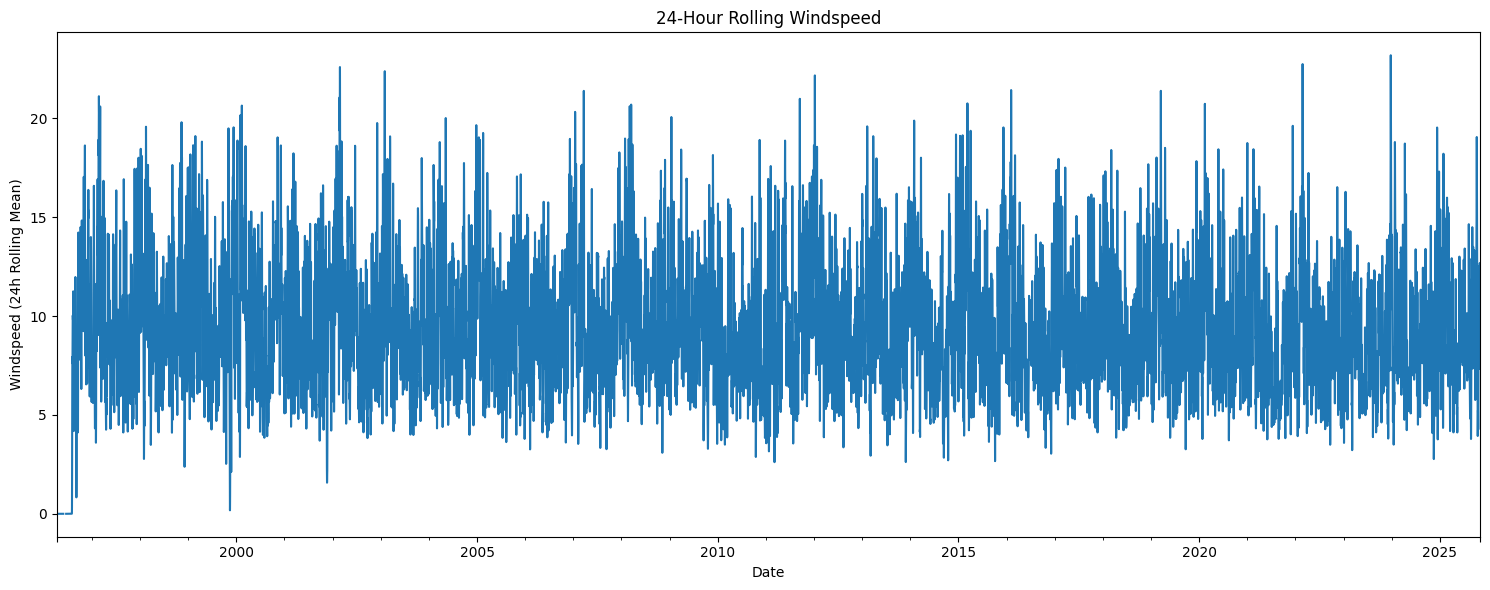

In [174]:
# Plot
plt.figure(figsize=(15,6))
df['wdsp'].plot()
plt.title("24-Hour Rolling Windspeed")
plt.xlabel("Date")
plt.ylabel("Windspeed (24h Rolling Mean)")
plt.tight_layout()
plt.show()

The max windspeed for each day

In [187]:
df_anal2 = pd.pivot_table(df,values='wdsp',
                          index= 'dateonly',
                          aggfunc='max')
print(df_anal2)

                 wdsp
dateonly             
1996-04-10   0.000000
1996-07-31   0.000000
1996-08-01   0.002736
1996-08-02   0.286529
1996-08-03   2.842252
...               ...
2025-10-28  12.634671
2025-10-29  12.637225
2025-10-30  12.688276
2025-10-31  12.632268
2025-11-01  11.945962

[10687 rows x 1 columns]


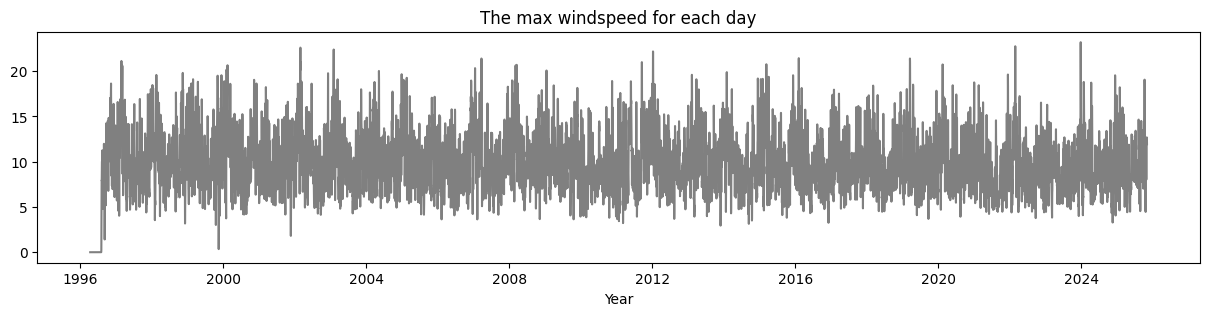

In [189]:
plt.figure(figsize=(15,3))
plt.plot(df_anal2.index, df_anal2["wdsp"], color="grey")
plt.title('The max windspeed for each day')
plt.xlabel('Year')
plt.show()

The monthly mean of the daily max windspeeds

In [195]:
#Pivot table
df_anal2 = pd.pivot_table(df,values='wdsp',
                          index=['dateonly','month'],
                          aggfunc='max')
print(df_anal2)

                         wdsp
dateonly   month             
1996-04-10 1996-04   0.000000
1996-07-31 1996-07   0.000000
1996-08-01 1996-08   0.002736
1996-08-02 1996-08   0.286529
1996-08-03 1996-08   2.842252
...                       ...
2025-10-28 2025-10  12.634671
2025-10-29 2025-10  12.637225
2025-10-30 2025-10  12.688276
2025-10-31 2025-10  12.632268
2025-11-01 2025-11  11.945962

[10687 rows x 1 columns]


In [ ]:
# Make "dateonly" and "month" become columns (and not index anymore)
df_anal3 = df_anal2.reset_index()
df_anal3.head()

,dateonly,month,wdsp
0,1996-04-10,1996-04,0.000000
1,1996-07-31,1996-07,0.000000
2,1996-08-01,1996-08,0.002736
3,1996-08-02,1996-08,0.286529
4,1996-08-03,1996-08,2.842252


In [198]:
df_anal4 = pd.pivot_table(df_anal3,values='wdsp',
                          index='month',
                          aggfunc='mean')
df_anal4.head()

,wdsp
month,
1996-04,0.000000
1996-07,0.000000
1996-08,8.213918
1996-09,8.420874
1996-10,12.149844


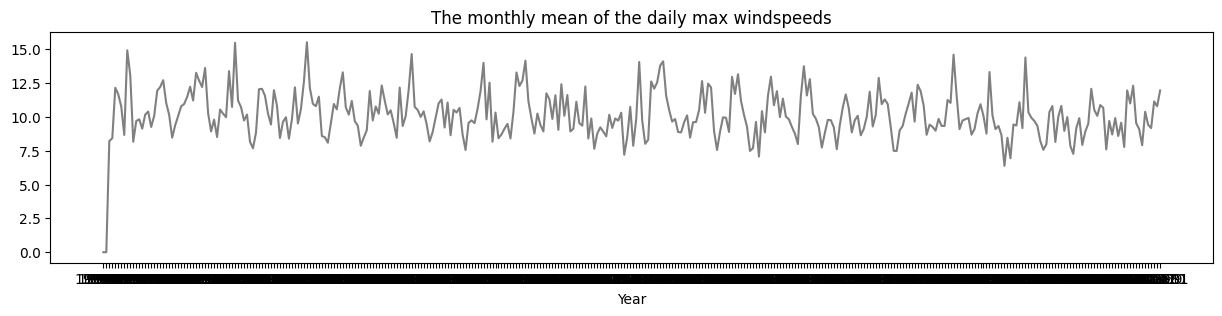

In [199]:
plt.figure(figsize=(15,3))
plt.plot(df_anal4.index, df_anal4["wdsp"], color="grey")
plt.title('The monthly mean of the daily max windspeeds')
plt.xlabel('Year')
plt.show()